# Model 1 

### Importing  Necessary Libraries

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.layers import Conv2D, UpSampling2D
from keras import Sequential
from skimage.color import rgb2lab, lab2rgb
from skimage.transform import resize
from skimage.io import imsave
import numpy as np


path = r"./input"




Found 710 images belonging to 1 classes.



### Data Loading and  Pre-Processing

In [ ]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                  )

train = train_datagen.flow_from_directory(path, 
                                          target_size=(256, 256), 
                                          batch_size=32, 
                                          class_mode=None)


### Convert from RGB to Lab

In [14]:
X =[]
Y =[]
for img in train[0]:
  try:
      lab = rgb2lab(img)
      X.append(lab[:,:,0]) 
      Y.append(lab[:,:,1:] / 128) 
  except:
     print('error')
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,)) 
print(X.shape)
print(Y.shape)

(32, 256, 256, 1)
(32, 256, 256, 2)


### Model Defining

In [3]:
#Encoder
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(256, 256, 1)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))

#Decoder
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))


In [15]:

model.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       147584    
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 256)       295168    
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 512)       1180160   
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 512)       2

### Model Visualization

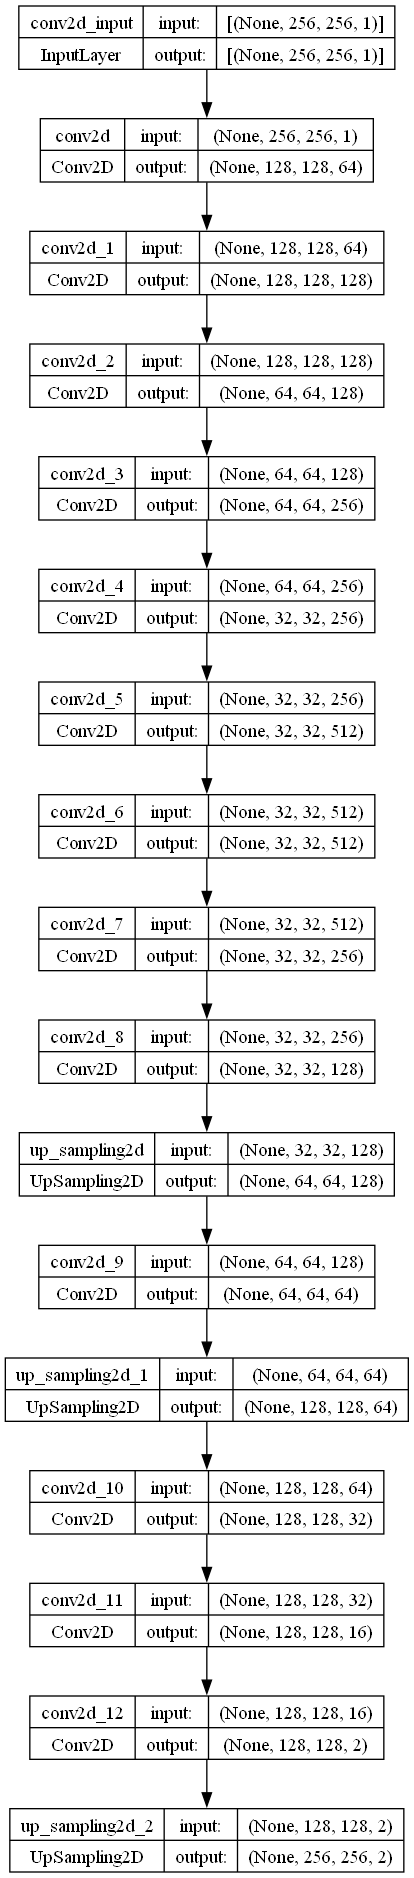

In [16]:
keras.utils.plot_model(model, to_file='model.png',show_shapes=True, show_layer_names=True)

In [6]:
history = keras.callbacks.History()
model.fit(X,Y,validation_split=0.2, epochs=300, batch_size=32,callbacks=[history])


Epoch 1/300
1/1 [==============================] - 14s 14s/step - loss: 0.0334 - accuracy: 0.4717 - val_loss: 0.6808 - val_accuracy: 0.5978
Epoch 2/300
1/1 [==============================] - 9s 9s/step - loss: 0.6865 - accuracy: 0.5912 - val_loss: 0.6065 - val_accuracy: 0.4017
Epoch 3/300
1/1 [==============================] - 9s 9s/step - loss: 0.5441 - accuracy: 0.4088 - val_loss: 0.0508 - val_accuracy: 0.4336
Epoch 4/300
1/1 [==============================] - 9s 9s/step - loss: 0.0566 - accuracy: 0.4306 - val_loss: 0.0220 - val_accuracy: 0.6106
Epoch 5/300
1/1 [==============================] - 9s 9s/step - loss: 0.0297 - accuracy: 0.6009 - val_loss: 0.0211 - val_accuracy: 0.4461
Epoch 6/300
1/1 [==============================] - 9s 9s/step - loss: 0.0284 - accuracy: 0.4604 - val_loss: 0.0197 - val_accuracy: 0.6123
Epoch 7/300
1/1 [==============================] - 9s 9s/step - loss: 0.0274 - accuracy: 0.6026 - val_loss: 0.0225 - val_accuracy: 0.5969
Epoch 8/300
1/1 [===============

In [7]:
sample_image = np.expand_dims(X[0],axis=0)

### Feature Maps Visualization

1/1 [==============================] - 0s 274ms/step


1/1 [==============================] - 0s 367ms/step


1/1 [==============================] - 0s 118ms/step


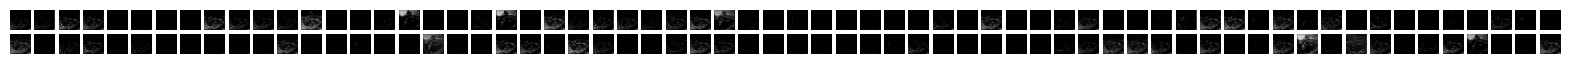

1/1 [==============================] - 0s 173ms/step


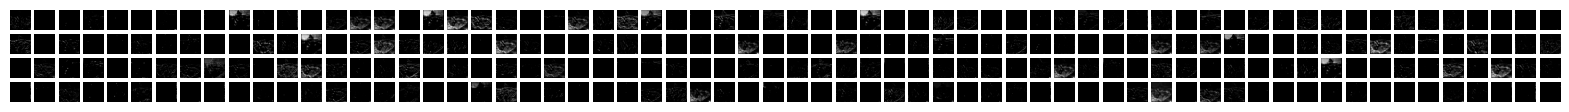

1/1 [==============================] - 0s 174ms/step


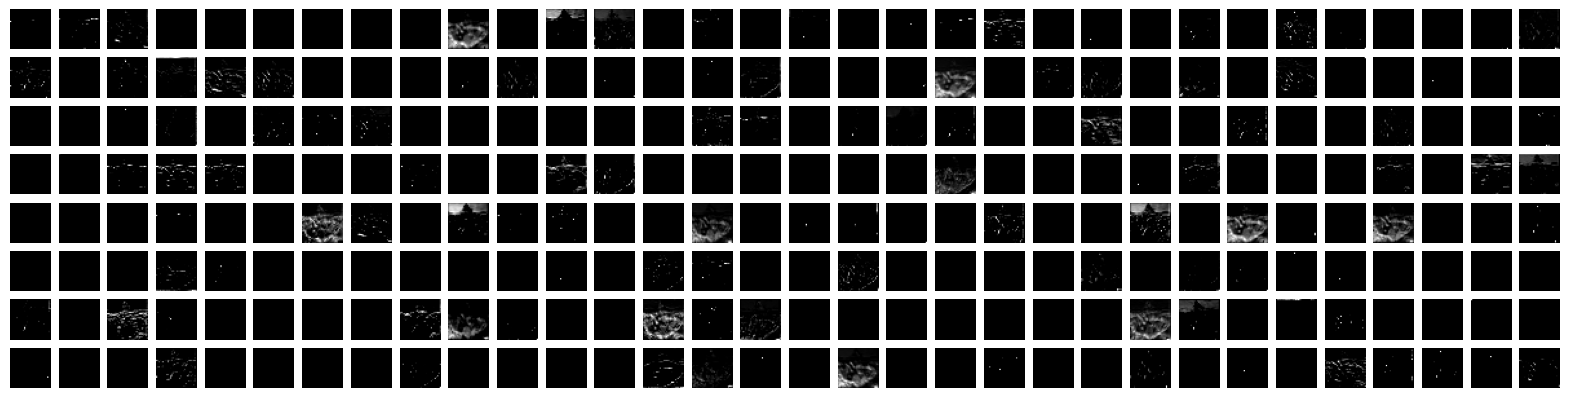

1/1 [==============================] - 0s 182ms/step


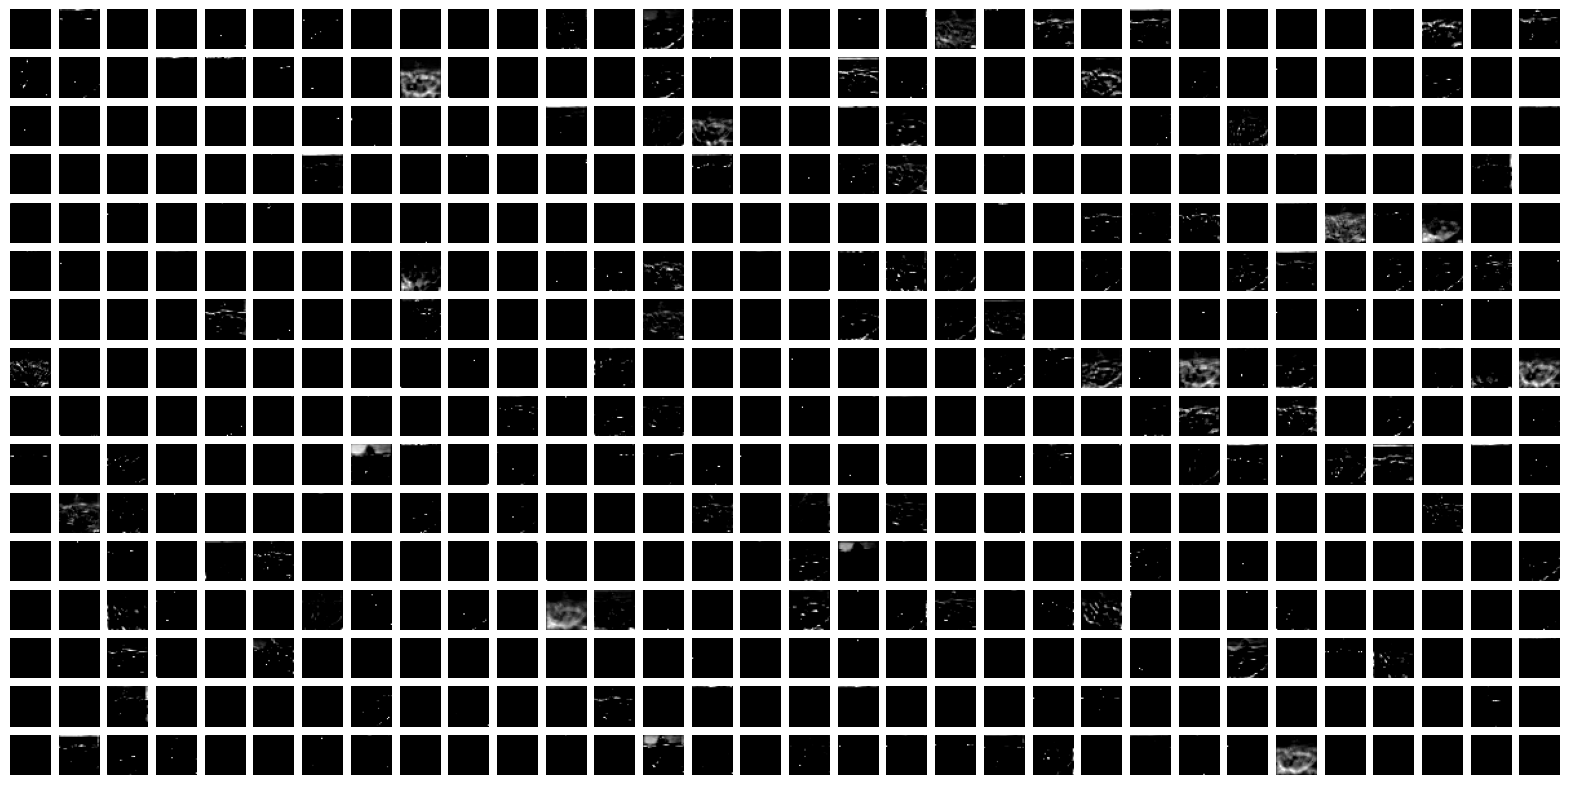

1/1 [==============================] - 0s 225ms/step


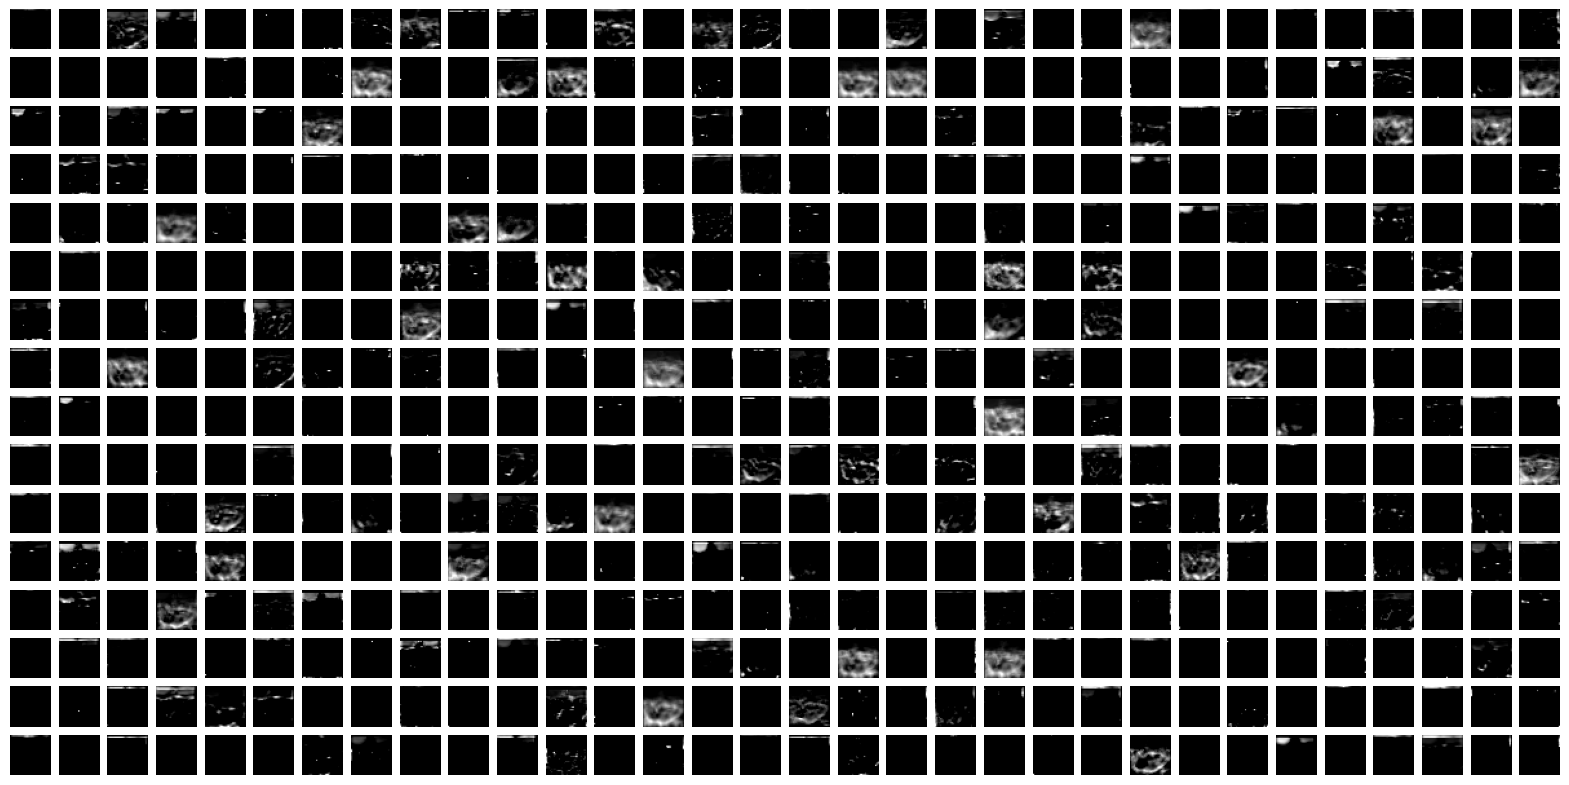

1/1 [==============================] - 0s 443ms/step


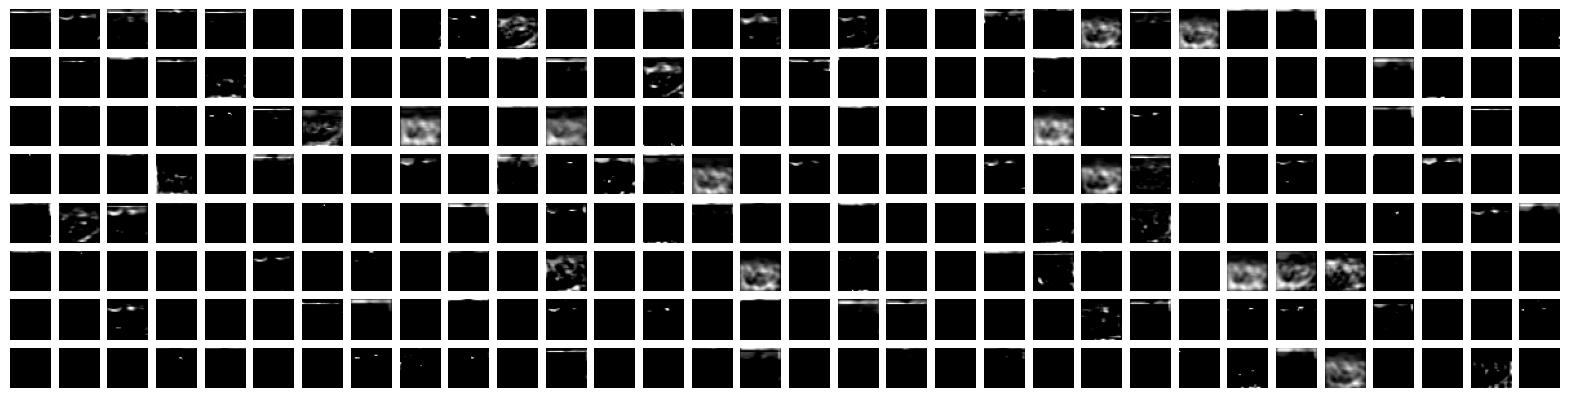

1/1 [==============================] - 0s 309ms/step


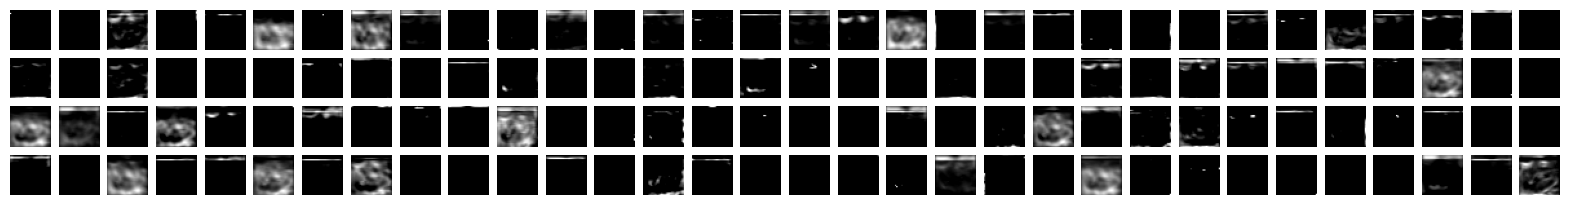

1/1 [==============================] - 0s 293ms/step


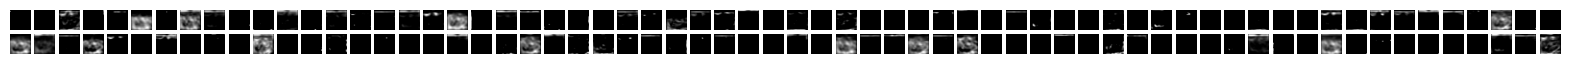

1/1 [==============================] - 0s 293ms/step


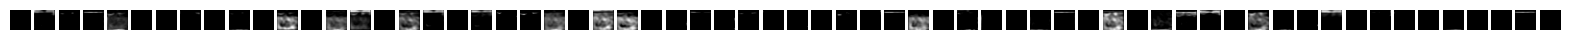

1/1 [==============================] - 0s 288ms/step


1/1 [==============================] - 0s 296ms/step


1/1 [==============================] - 0s 331ms/step


1/1 [==============================] - 0s 348ms/step


1/1 [==============================] - 0s 346ms/step


In [8]:
from keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

input_image = sample_image

layer_outputs = [layer.output for layer in model.layers]
feature_map_models = [Model(inputs=model.inputs, outputs=output) for output in layer_outputs]

for feature_map_model in feature_map_models:
    feature_map = feature_map_model.predict(input_image)
    
    n_features = feature_map.shape[-1]  
    size = feature_map.shape[1]  
    plt.figure(figsize=(20, 20))
    for i in range(1, n_features + 1):
        plt.subplot(size, size, i)
        plt.imshow(feature_map[0, :, :, i - 1], cmap='gray')
        plt.axis('off')

    plt.show()


### Model Prediction

Download test images

1/1 [==============================] - 0s 234ms/step


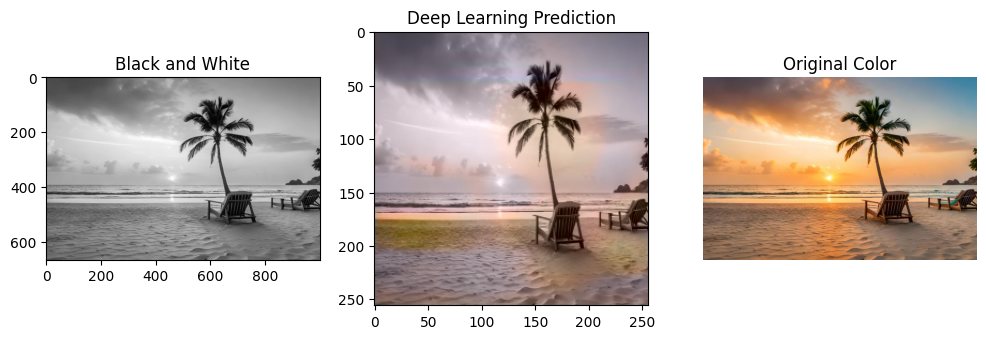

1/1 [==============================] - 0s 179ms/step


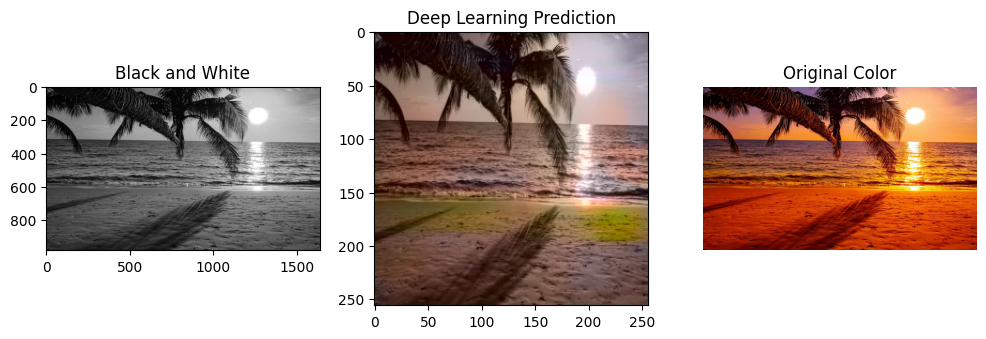

1/1 [==============================] - 0s 156ms/step


C:\Users\vaibhav_cs\AppData\Local\Temp\ipykernel_4256\2108382876.py:44: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 8 negative Z values that have been clipped to zero
  axarr[1].imshow(lab2rgb(result))


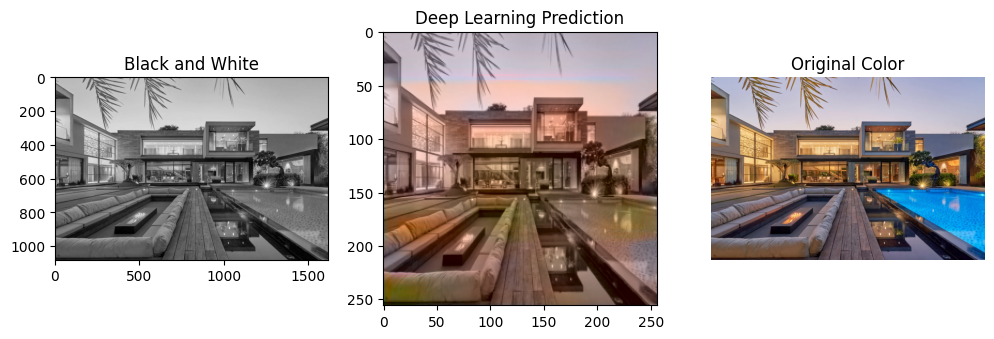

1/1 [==============================] - 0s 242ms/step


C:\Users\vaibhav_cs\AppData\Local\Temp\ipykernel_4256\2108382876.py:44: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 36 negative Z values that have been clipped to zero
  axarr[1].imshow(lab2rgb(result))


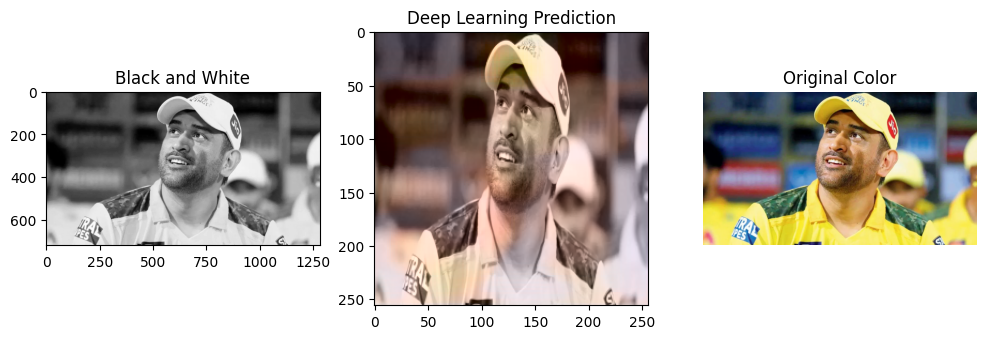

1/1 [==============================] - 0s 191ms/step


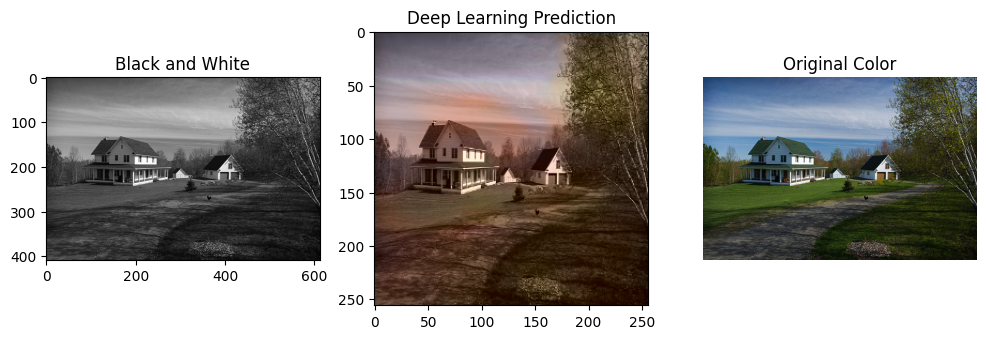

In [41]:
from PIL import Image
import os
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from skimage.color import rgb2lab, lab2rgb
from skimage.transform import resize
import matplotlib.pyplot as plt

gray_images_path = 'ne_images/gray/'
rgb_images_path = 'ne_images/rgb/'

gray_image_files = os.listdir(gray_images_path)

for file_name in gray_image_files:
    if file_name.endswith(('.jpg', '.jpeg', '.png')):
        gray_file_path = os.path.join(gray_images_path, file_name)
        rgb_file_path = os.path.join(rgb_images_path, file_name)

        img_gray = Image.open(gray_file_path).convert('RGB')
        img1_color = []
        img1 = img_to_array(img_gray)
        img1 = resize(img1, (256, 256))
        img1_color.append(img1)

        img1_color = np.array(img1_color, dtype=float)
        img1_color = rgb2lab(1.0 / 255 * img1_color)[:, :, :, 0]
        img1_color = img1_color.reshape(img1_color.shape + (1,))

        output1 = model.predict(img1_color)
        output1 = output1 * 128

        result = np.zeros((256, 256, 3))
        result[:, :, 0] = img1_color[0][:, :, 0]
        result[:, :, 1:] = output1[0]

        img_original = Image.open(rgb_file_path)

        f, axarr = plt.subplots(1, 3, figsize=(12, 4))
        axarr[0].title.set_text('Black and White')
        axarr[1].title.set_text('Deep Learning Prediction')
        axarr[2].title.set_text('Original Color')
        axarr[0].imshow(img_gray.convert('L'), cmap='gray')
        axarr[1].imshow(lab2rgb(result))
        axarr[2].imshow(img_original)
        plt.show()


### Comparing With Open CV

1/1 [==============================] - 0s 162ms/step


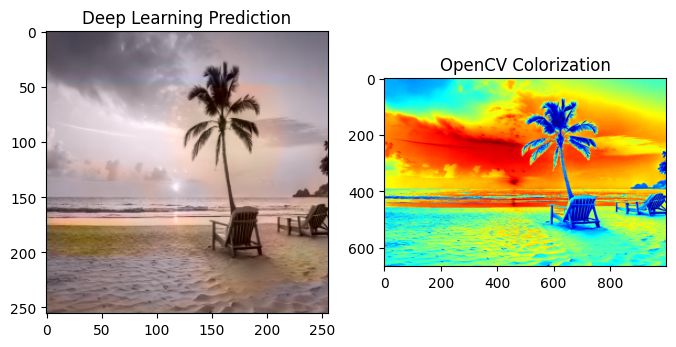

1/1 [==============================] - 0s 150ms/step


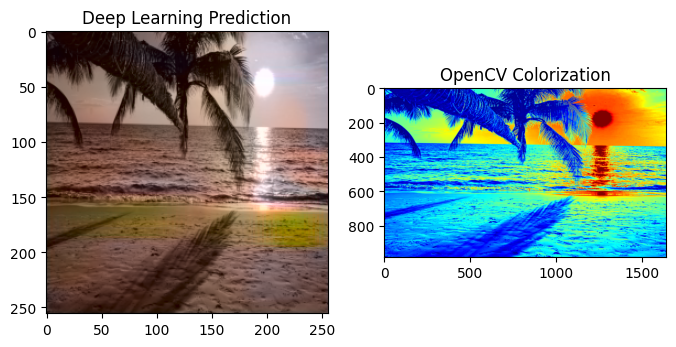

1/1 [==============================] - 0s 178ms/step


C:\Users\vaibhav_cs\AppData\Local\Temp\ipykernel_4256\492698696.py:38: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 8 negative Z values that have been clipped to zero
  predicted=lab2rgb(result)


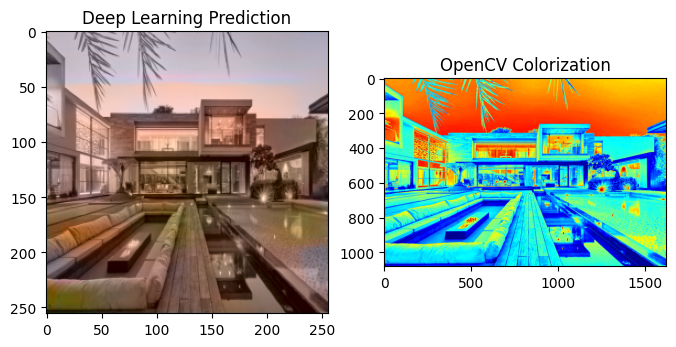

1/1 [==============================] - 0s 127ms/step


C:\Users\vaibhav_cs\AppData\Local\Temp\ipykernel_4256\492698696.py:38: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 36 negative Z values that have been clipped to zero
  predicted=lab2rgb(result)


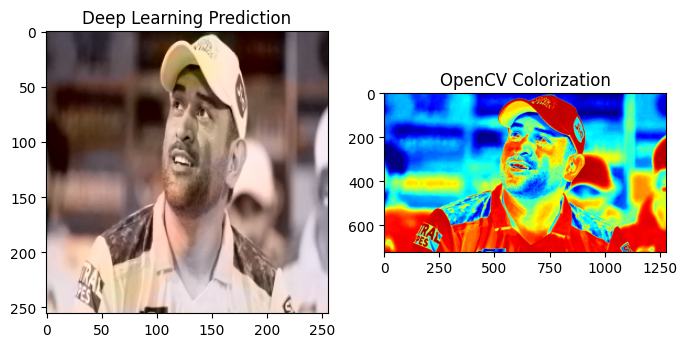

1/1 [==============================] - 0s 130ms/step


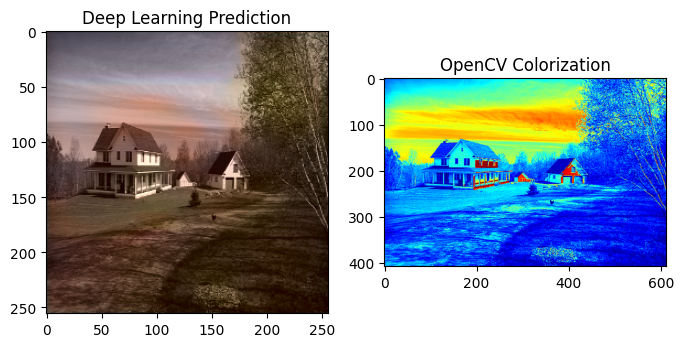

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Paths to your 'gray' folder
gray_images_path = 'ne_images/gray/'

# List all files in the 'gray' folder
gray_image_files = os.listdir(gray_images_path)
pred=[]
for file_name in gray_image_files:
    if file_name.endswith(('.jpg', '.jpeg', '.png')):
        gray_file_path = os.path.join(gray_images_path, file_name)

        img_gray = Image.open(gray_file_path).convert('RGB')
        img1_color = []
        img1 = img_to_array(img_gray)
        img1 = resize(img1, (256, 256))
        img1_color.append(img1)

        img1_color = np.array(img1_color, dtype=float)
        img1_color = rgb2lab(1.0 / 255 * img1_color)[:, :, :, 0]
        img1_color = img1_color.reshape(img1_color.shape + (1,))

        output1 = model.predict(img1_color)
        output1 = output1 * 128

        result = np.zeros((256, 256, 3))
        result[:, :, 0] = img1_color[0][:, :, 0]
        result[:, :, 1:] = output1[0]

        img_gray_cv = cv2.imread(gray_file_path, cv2.IMREAD_GRAYSCALE)
        colorized_img_opencv = cv2.applyColorMap(img_gray_cv, cv2.COLORMAP_JET)

        f, axarr = plt.subplots(1, 2, figsize=(8, 4))
        axarr[0].title.set_text('Deep Learning Prediction')
        axarr[1].title.set_text('OpenCV Colorization')
        predicted=lab2rgb(result)
        pred.append(predicted)
        axarr[0].imshow(predicted)
        axarr[1].imshow(cv2.cvtColor(colorized_img_opencv, cv2.COLOR_BGR2RGB))
        plt.show()


### Performance Metrics

In [29]:
score = model.evaluate(X, Y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.028190260753035545
Test accuracy: 0.7284903526306152


[]

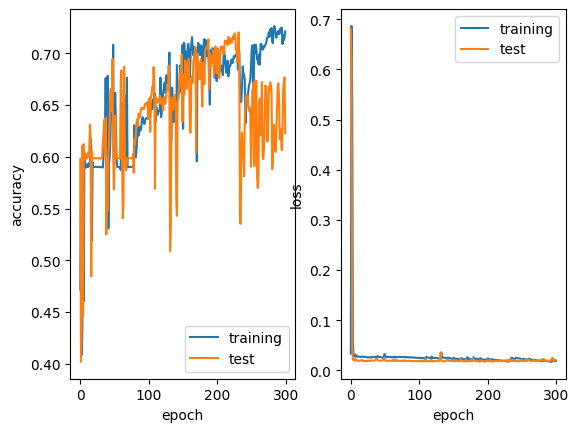

In [9]:
plt.subplot(121)
plt.plot(history.history['accuracy'],label='training')
plt.plot(history.history['val_accuracy'],label = 'test')
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.subplot(122)
plt.plot(history.history['loss'],label='training')
plt.plot(history.history['val_loss'],label = 'test')
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot()

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Example data: 
# X = input sequences, Y = output values
X = [[1, 2, 3], [2, 3, 4], [3, 4, 5]]
Y = [4, 5, 6]

# Reshape input to be [samples, time steps, features]
X = np.array(X, dtype=float)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))
Y = np.array(Y, dtype=float)

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(3, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fit model
model.fit(X, Y, epochs=200, verbose=0)

# Example prediction
test_input = np.array([4, 5, 6])
test_input = test_input.reshape((1, 3, 1))
test_output = model.predict(test_input, verbose=0)
print(test_output)


[[9.748091]]
